<a href="https://colab.research.google.com/github/VioletKarasik/Colaboratory/blob/main/lesson3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Лабораторная работа 3. Решение задачи классификации

###1. Импорт библиотек, необходимые пакеты и функции

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
plt.rc("font", size=14)

###2. Загрузка исходных данных

In [44]:
data=pd.read_csv('bank_data.csv',header=0)
data=data.dropna() #Удаление пропущенных данных
print(data.shape)
data.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


###3. Выборка данных

In [45]:
a=1000*(4-1) #4 – номер студента по журналу
data=data.iloc[a:a+10000,:]

###4. Объединение разных уровней среднего образования в один

In [46]:
data['education']=np.where(data['education'] =='basic.9y',
'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y',
'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y',
'Basic', data['education'])

###5. Проверка на наличие различий между подписавшимися и не подписавшимися по непрерывным переменным

In [47]:
print(list(data.columns))
data.groupby('y').mean()

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


<ipython-input-47-4f6136569e41>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('y').mean()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.856805,224.136103,2.592930,985.370370,0.132725,0.252381,93.606022,-40.566881,3.811019,5176.003580
1,40.846016,560.077887,1.971352,790.060877,0.506714,-1.246643,93.368434,-39.884781,2.091678,5092.807162


###6. Различий практически нет, удалим соответствующие столбцы

In [48]:
print(list(data.columns))
data.groupby('y').mean()
data.drop(data.columns[[0, 16, 17]], axis = 1, inplace = True) #age, cons_price_idx, cons_conf_idx

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


<ipython-input-48-bcf1c097deab>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('y').mean()


###7. Используя графики, проверим есть ли различия между категориальными переменными ('job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome')


['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'euribor3m', 'nr_employed', 'y']


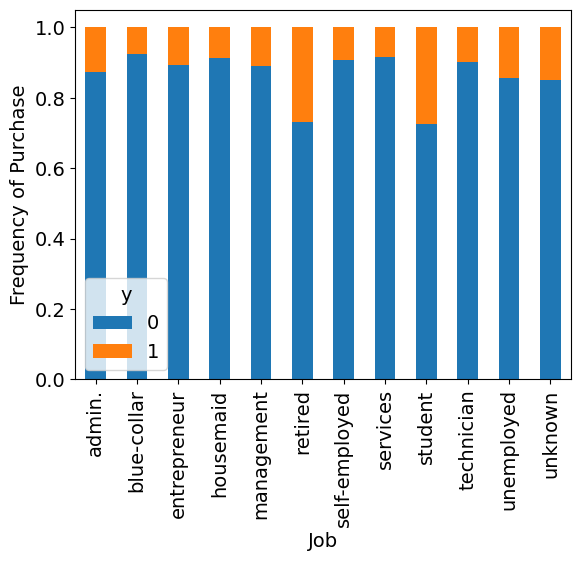

In [49]:
#JOB

table=pd.crosstab(data.job,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',
stacked=True)
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
print(list(data.columns))

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'euribor3m', 'nr_employed', 'y']


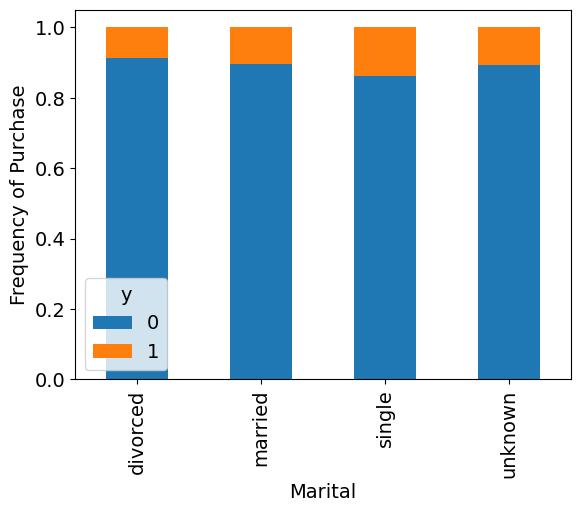

In [50]:
#MARITAL

table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',
stacked=True)
plt.xlabel('Marital')
plt.ylabel('Frequency of Purchase')
print(list(data.columns))

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'euribor3m', 'nr_employed', 'y']


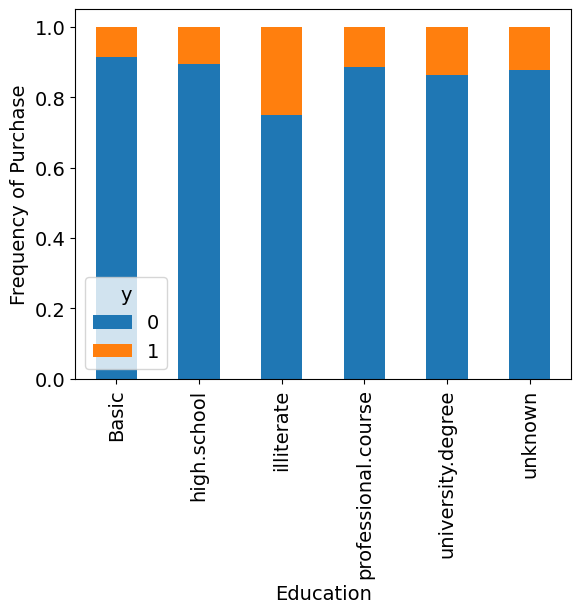

In [51]:
#EDUCATION

table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',
stacked=True)
plt.xlabel('Education')
plt.ylabel('Frequency of Purchase')
print(list(data.columns))

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'euribor3m', 'nr_employed', 'y']


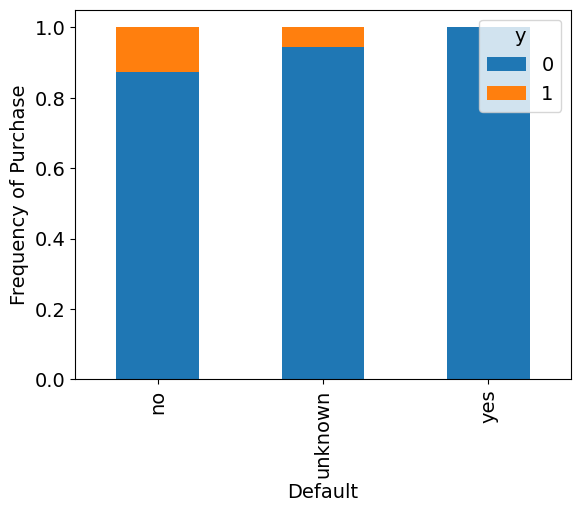

In [52]:
#DEFAULT

table=pd.crosstab(data.default,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',
stacked=True)
plt.xlabel('Default')
plt.ylabel('Frequency of Purchase')
print(list(data.columns))

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'euribor3m', 'nr_employed', 'y']


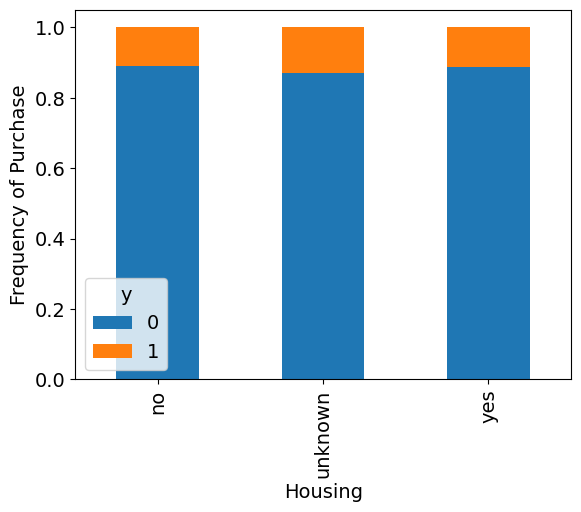

In [53]:
#HOUSING

table=pd.crosstab(data.housing,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',
stacked=True)
plt.xlabel('Housing')
plt.ylabel('Frequency of Purchase')
print(list(data.columns))

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'euribor3m', 'nr_employed', 'y']


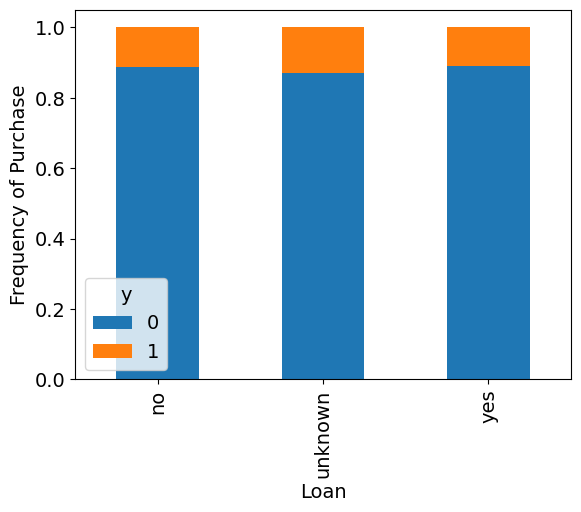

In [54]:
#LOAN

table=pd.crosstab(data.loan,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',
stacked=True)
plt.xlabel('Loan')
plt.ylabel('Frequency of Purchase')
print(list(data.columns))

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'euribor3m', 'nr_employed', 'y']


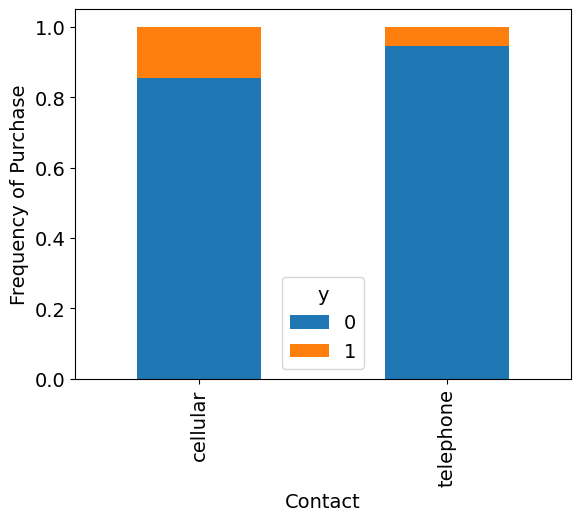

In [55]:
#CONTACT

table=pd.crosstab(data.contact,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',
stacked=True)
plt.xlabel('Contact')
plt.ylabel('Frequency of Purchase')
print(list(data.columns))

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'euribor3m', 'nr_employed', 'y']


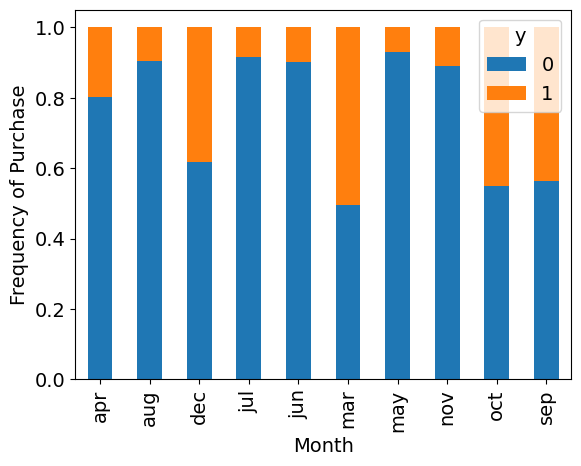

In [56]:
#MONTH

table=pd.crosstab(data.month,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',
stacked=True)
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
print(list(data.columns))

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'euribor3m', 'nr_employed', 'y']


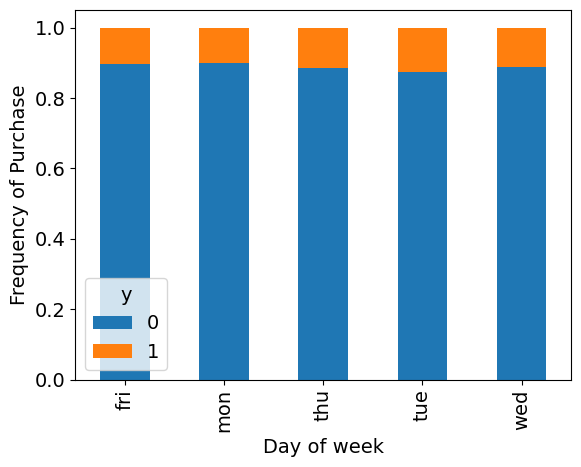

In [57]:
#DAY OF WEEK

table=pd.crosstab(data.day_of_week,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',
stacked=True)
plt.xlabel('Day of week')
plt.ylabel('Frequency of Purchase')
print(list(data.columns))

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'euribor3m', 'nr_employed', 'y']


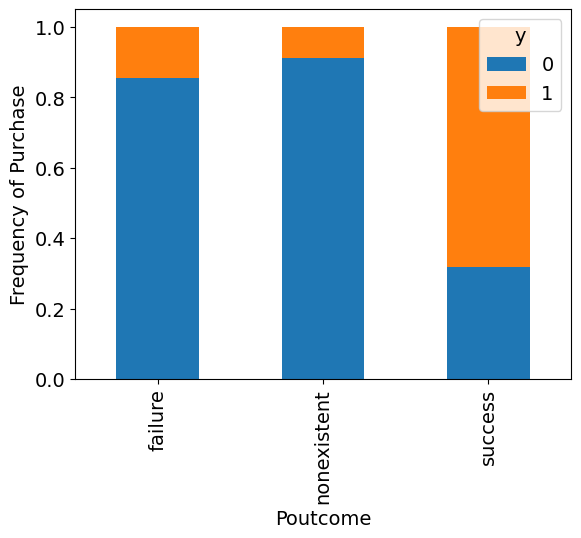

In [58]:
#POUTCOME

table=pd.crosstab(data.poutcome,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',
stacked=True)
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
print(list(data.columns))

In [59]:
#выбрасываем переменные с незначительным разбросом данных
data.drop(data.columns[[1, 4, 5, 8]], axis = 1, inplace = True) #data on marital status, housing, loan, and the day of the week

###8. Из оставшихся категориальных переменных создадим бинарные, соответствующие каждому уровню

In [60]:
data = pd.get_dummies(data, columns =['job', 'education', 'default', 'contact','month', 'poutcome'])

###9. Удалим столбцы, соответствующие уровню unknown в разных переменных


In [61]:
print(list(data.columns))
data.head()

['duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'euribor3m', 'nr_employed', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'education_Basic', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']


,duration,campaign,pdays,previous,emp_var_rate,euribor3m,nr_employed,y,job_admin.,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
3000,166,1,999,1,-1.7,0.898,4991.6,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3001,1388,2,999,0,-1.8,1.299,5099.1,1,0,1,...,0,0,0,1,0,0,0,0,1,0
3002,205,11,999,0,1.4,4.961,5228.1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
3003,177,1,999,0,1.4,4.966,5228.1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3004,10,13,999,0,1.4,4.959,5228.1,0,1,0,...,0,1,0,0,0,0,0,0,1,0


from matplotlib import pyplot as plt
_df_16['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['duration'].plot(kind='hist', bins=20, title='duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['campaign'].plot(kind='hist', bins=20, title='campaign')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['previous'].plot(kind='hist', bins=20, title='previous')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='index', y='duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='duration', y='campaign', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='campaign', y='previous', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='previous', y='emp_var_rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['duration']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('duration')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['campaign']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('campaign')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['previous']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('previous')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['emp_var_rate']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('emp_var_rate')

from matplotlib import pyplot as plt
_df_28['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['duration'].plot(kind='line', figsize=(8, 4), title='duration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['campaign'].plot(kind='line', figsize=(8, 4), title='campaign')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['previous'].plot(kind='line', figsize=(8, 4), title='previous')
plt.gca().spines[['top', 'right']].set_visible(False)

In [62]:
print(list(data.columns))
data.head()

['duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'euribor3m', 'nr_employed', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'education_Basic', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']


,duration,campaign,pdays,previous,emp_var_rate,euribor3m,nr_employed,y,job_admin.,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
3000,166,1,999,1,-1.7,0.898,4991.6,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3001,1388,2,999,0,-1.8,1.299,5099.1,1,0,1,...,0,0,0,1,0,0,0,0,1,0
3002,205,11,999,0,1.4,4.961,5228.1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
3003,177,1,999,0,1.4,4.966,5228.1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3004,10,13,999,0,1.4,4.959,5228.1,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [63]:
#удаляем job_unknown, education_unknown, default_unknown
data.drop(data.columns[[19, 25, 27]], axis = 1, inplace = True)

In [64]:
#проверка удалилось или нет
print(list(data.columns))
data.head()

['duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'euribor3m', 'nr_employed', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'education_Basic', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'default_no', 'default_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']


,duration,campaign,pdays,previous,emp_var_rate,euribor3m,nr_employed,y,job_admin.,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
3000,166,1,999,1,-1.7,0.898,4991.6,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3001,1388,2,999,0,-1.8,1.299,5099.1,1,0,1,...,0,0,0,1,0,0,0,0,1,0
3002,205,11,999,0,1.4,4.961,5228.1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
3003,177,1,999,0,1.4,4.966,5228.1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3004,10,13,999,0,1.4,4.959,5228.1,0,1,0,...,0,1,0,0,0,0,0,0,1,0


###10. Разделим переменные на объясняющие (X) и объясняемую (Y)

In [65]:
X = data.loc[:,data.columns!='y']
Y = data.loc[:,data.columns=='y']
Y=Y['y']

###11. Шкалируем данные

In [66]:
scaler = StandardScaler()
X=scaler.fit_transform(X)

###12. Разделим переменные обучающие и тестовые, посмотрим сколько данных в каждом множестве

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
random_state=0)
print(X_train.shape)
print(X_test.shape)

(7500, 40)
(2500, 40)


###13. Построим уравнение логистической регрессии

In [68]:
logreg = LogisticRegression(solver='lbfgs',random_state=0)
logreg.fit(X_train,Y_train)

LogisticRegression(random_state=0)

###14. Осуществим предсказание по тестовому множеству, найдем точность предсказания


In [69]:
predicted_y = logreg.predict(X_test)
predicted_y
print('Accuracy: {:.4f}'.format(logreg.score(X_test, Y_test)))

Accuracy: 0.9140
